# Credit Card Marketing Segmentation Using K-Means Clustering

## Author

A. C. Sanders, Ph.D.

## Project Description

Description

## Acknowledgements

Acknowledge

## Business Case and Problem

Case

## Strategy and Methodology

Description

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

print("Libraries imported")

Libraries imported


## Import the Data

In [106]:
# Importing the credit card csv file and creating a new pandas dataframe
credit_file = "C:/Users/adams/Desktop/Data Science/Datasets/credit.csv"
credit_df = pd.read_csv(credit_file)

In [107]:
# Display the first five rows of the dataframe, credit_df
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [108]:
# Examine the data
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Observation:** There are null values. I will deal with those values later in the data cleansing section.

## Exploratory Data Analysis

Initial data exploration and visualization

### Customer Balances

In [109]:
# Let's get the average for BALANCE
print("average = ", credit_df["BALANCE"].mean())

average =  1564.4748276781038


In [110]:
# The minimum value for BALANCE
print("min = ", credit_df["BALANCE"].min())

min =  0.0


In [111]:
# The maximum value for BALANCE
print("max = ", credit_df["BALANCE"].max())

max =  19043.13856


### Summary Statistics

In [112]:
# Use the describe() method to get more statistical insights
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Observations:** Most of the data makes sense and the *mean*, *min*, and *max* values match the values I got above.

**Further Examinations:**
1. Let's take a closer look at the customer that spent $40,761.25 on a one-off purchase.
2. Let's look at the person who made the maximum amount for *purchases*.
3. Let's see who has the biggest credit limit.
4. Let's look at the customer that made the maximum cash advance transaction. 
5. For the person with the maximum cash advance transaction: (A) how many cash advance transactions were made? and (B) how often did she/he pay her/his bill?

In [113]:
# Locate the customer with the largest one-off purchase
credit_df[credit_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [114]:
# The maximum purchase amount
credit_df["PURCHASES"].max()

49039.57

In [115]:
# Locate the person who made the biggest purchase
credit_df[credit_df["PURCHASES"] == 49039.57]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [116]:
# The biggest credit limit
credit_df["CREDIT_LIMIT"].max()

30000.0

In [117]:
# Locate the person with the biggest credit limit
credit_df[credit_df["CREDIT_LIMIT"] == 30000.0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4905,C15041,1409.256223,0.900000,4569.65,1748.94,2820.71,3883.517967,0.700000,0.6,0.600000,0.4,5,24,30000.0,5772.813158,472.103929,0.00,10
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.5,0.083333,0.0,0,33,30000.0,30029.014960,11853.796130,0.75,12


**Observations:** We see that there are two people with the credit limit of 30000.00. We can also note the differences in their respective purchasing and paying behavior. For instance, the individual with customer ID C17237 made 26784.62 worth of purchases. This is far more than the other individual with customer ID C15041 who only made 4569.65 worth of purchases. On the other hand, customer C15041 made Cash Advance transactions worth around 3883.52, whereas customer C17237 didn't make any Cash Advance transactions.

In [118]:
# What is the maximum value for Cash Advance?
credit_df["CASH_ADVANCE"].max()

47137.211760000006

In [119]:
# Locate the customer that made the maximum cash advance transaction
credit_df[credit_df["CASH_ADVANCE"] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**Observation:** We can see that they made 123 *Cash Advance* transactions. We also see that they don't pay their bill in full given the 0.0 value under *Percent Full Payment* column. This type of customer pays a lot of interest and is therefore a good source of revenue for the bank.

### Correlation

In [120]:
# Display the correlation values
credit_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


### Data Visualizations

Let's create some visualizations that will provide us with more insight

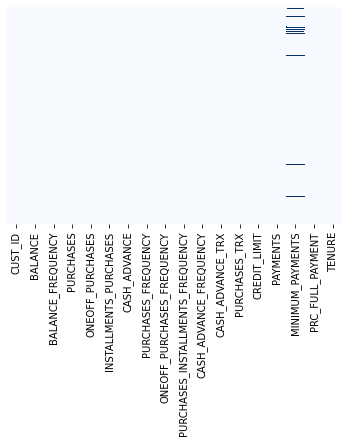

In [121]:
# heatmap to visualize any null values in the data
sns.heatmap(credit_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

**Observation:** We can see that we have some missing values. Our heat map shows that there are quite a few missing values under the *Minimum Payments* column. But there could be more missing values that don't clearly show up in the visualization. We can use *isnull().sum()* to return every missing value in every column.

In [122]:
# Let's get a more accurate diagnosis concerning our missing values
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Note:** I'll have to deal with the missing values in both *Minimum Payments* and *Credit Limit*.

#### Distribution Plot

Let's create a distribution plot. But before we can do that, let's drop the *Cust ID* column given that it is not relevant.

In [123]:
# Create a new dataframe, df, in which we drop the 'Cust ID' column
df = credit_df.drop("CUST_ID", axis = 1)
# Display the dataframe
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [124]:
# Find the length or number of columns
n = len(df.columns)
n

17

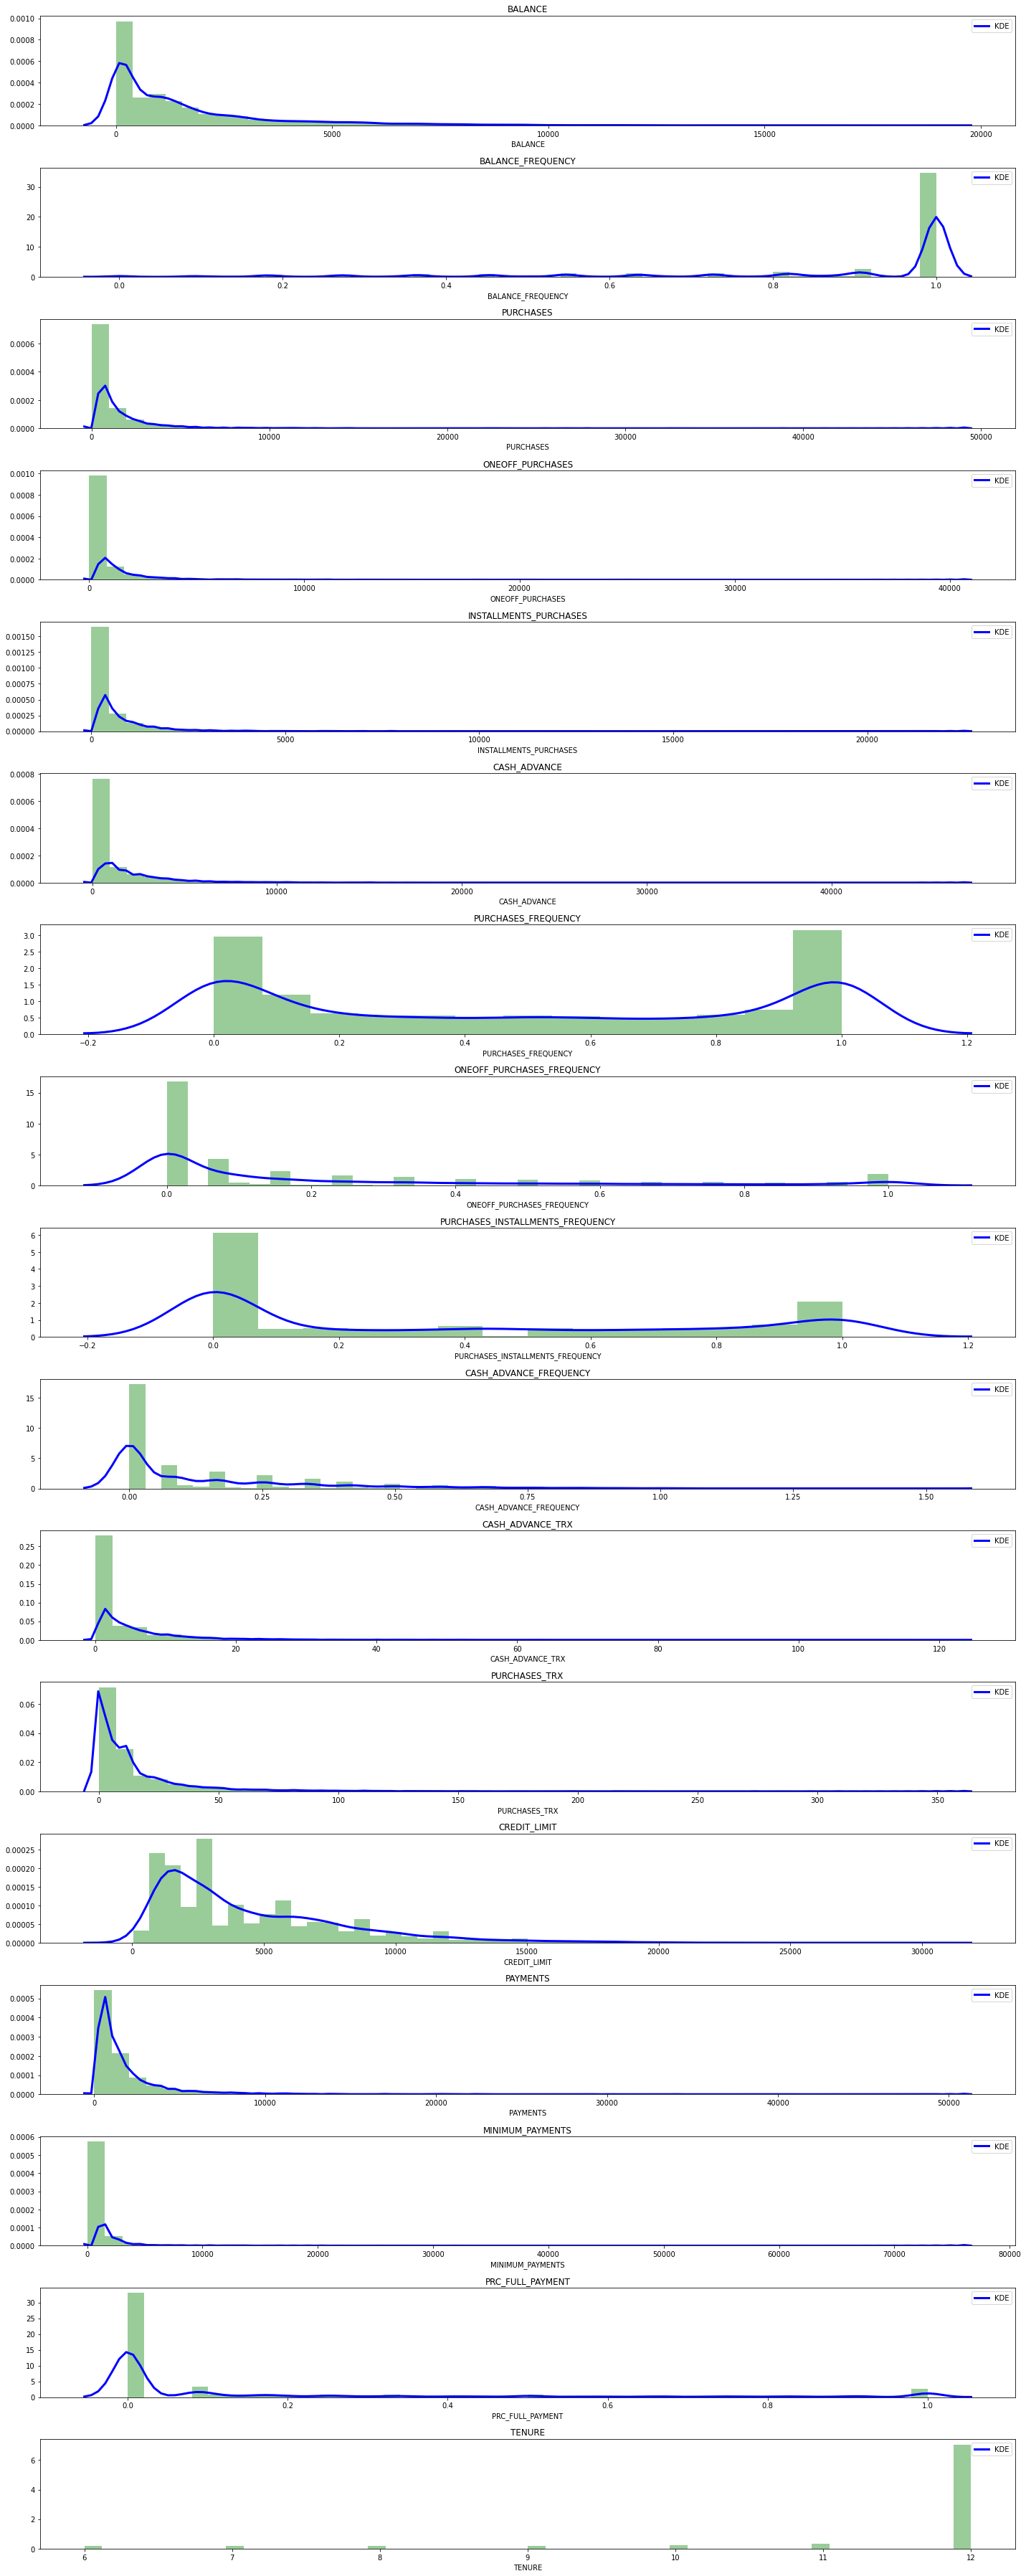

In [125]:
import warnings
warnings.filterwarnings("ignore")

# Create the distribution
plt.figure(figsize = (20, 50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"b", "lw":3, "label":"KDE"}, hist_kws={"color":"g"})
    plt.title(df.columns[i])
    
plt.tight_layout()

**Remarks:** Note that I have plotted histograms and KDE plots for each feature. KDE Plots depict the Kernel Density Estimate. KDE visualizes the probability density of a continuous variable. It shows the probability density at different values in a continuous variable. 


**Observations:** We note several interesting aspects of our data. First, we only have a small amount of customers that pay in full. That is to say, the vast majority of customers routinely pay interest. Second, most of our customer tenure is around 12 years. Third, the average for *Balance* is around 1,500. Fourth, when it comes to *Purchase Frequency*, we see separate groupings of customers where one groups is low (around zero) and the other is high (around 1). Fifth, the frequencies for *One Off Purchases* and *Purchase Installment Frequency* is low - i.e., they're closer to zero.

#### Correlation Matrix

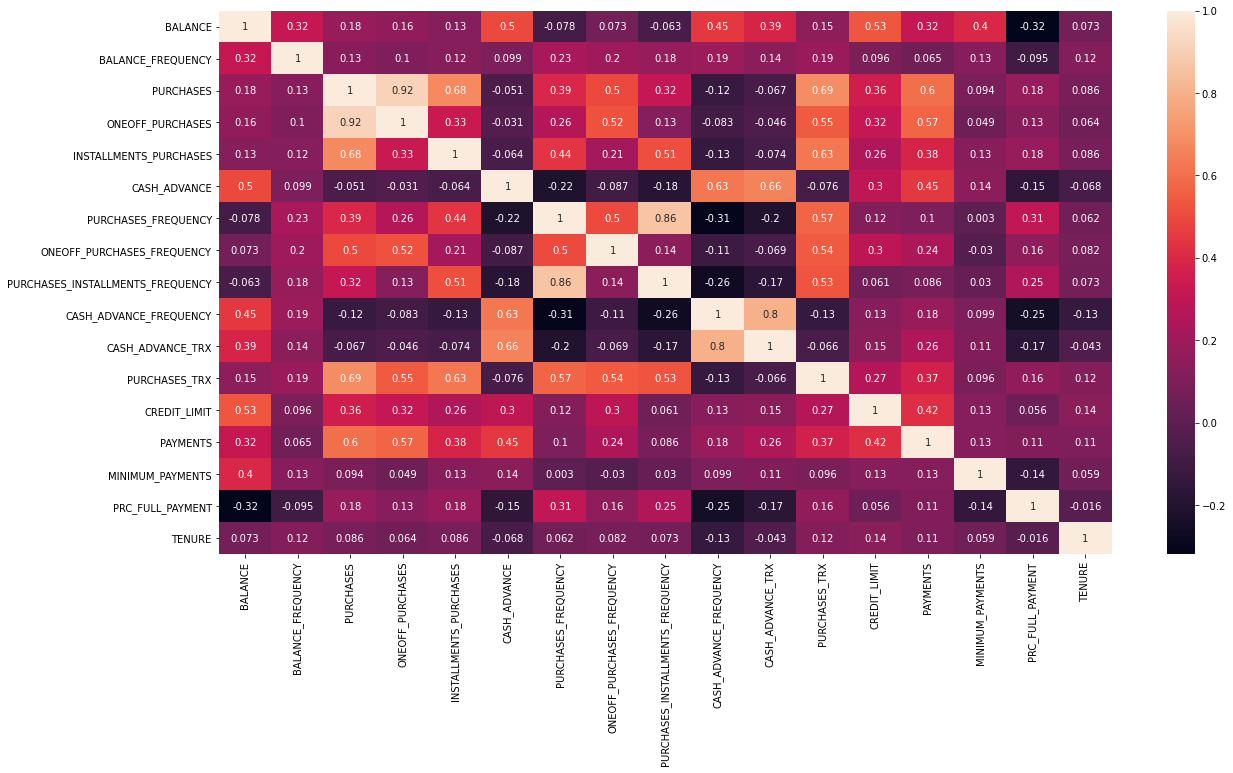

In [126]:
# Plot a correlation matrix based on the correlation values between variables
correlations = df.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot=True)

**Observations:** We can see several interesting correlations. Let us briefly note a few correlations of interest. First, *Purchases* has a high correlation (0.92) with *One Off Purchases*. *Purchases* is also highly correlated with *Purchase Transactions* (.69).

## Data Cleansing and Processing

I'll handle missing values, drop irrelevant columns, correct any data formatting issues, and standardize the data. This will prepare the data for machine learning.

### Dealing with Missing Values

In [127]:
# Impute missing values using the mean
df = df.fillna(df.mean())

In [128]:
# Check the missing values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [129]:
# Re-check the summary statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Handle Duplicates 

In [130]:
# Check for any duplicates in the data
df.duplicated().sum()

0

Good. There are no duplicate rows.

### Filtering columns

We dropped the *Cust ID* column. Let's check to see if there are other features that are not relevant.

In [131]:
# Recall the columns
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In this case, we can keep the rest of the columns.

### Check Data Types

In [133]:
# Use dtypes to check the specific types of data
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [134]:
# Let's convert all columns to floats
df["CASH_ADVANCE_TRX"] = df["CASH_ADVANCE_TRX"].astype(float)
df["PURCHASES_TRX"] = df["PURCHASES_TRX"].astype(float)
df["TENURE"] = df["TENURE"].astype(float)

In [135]:
# Ceck the data types again
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [136]:
# Check the first five rows
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [140]:
# Check the shape of the dataframe, df
df.shape

(8950, 17)

### Data Normalization

I'll now scale the data. This will help with machine learning.

In [137]:
# Use StandardScaler to scale the data and create a new NumPy array, df_scaled
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [139]:
# Check the shape of the new dataframe
df_scaled.shape

(8950, 17)

In [142]:
# Check the array
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])